In [1]:
%matplotlib inline

import hdbscan
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
DF = pd.read_csv("migration_transpose.csv",sep=";",index_col=0,decimal=",")
cell_types = DF["cell_type"]

In [3]:
# standarized
stder = StandardScaler().fit(DF.drop("cell_type",axis=1))
DF_std = stder.transform(DF.drop("cell_type",axis=1))

minmax = MinMaxScaler().fit(DF.drop("cell_type",axis=1))
DF_minmax = minmax.transform(DF.drop("cell_type",axis=1))

In [4]:
#PCA Estandarizando
pca_std = PCA(n_components=2).fit(DF_std)
pca_std_data = pca_std.transform(DF_std)

#PCA Sin estandarizar
#pca = PCA(n_components=2).fit(DF.drop("cell_type",axis=1))
#pca_data = pca.transform(DF.drop("cell_type",axis=1))

#PCA con minmax
pca_minmax = PCA(n_components=2).fit(DF_minmax)
pca_minmax_data = pca_minmax.transform(DF_minmax)

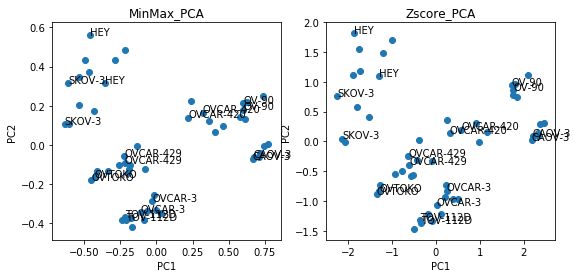

In [5]:
#Graficos PCA

data_std_T = pca_std_data.T #PCA standardized data
data_minmax_T = pca_minmax_data.T

plt.figure(figsize=(9,4))
ax = plt.subplot(121)

plt.scatter(data_minmax_T[0],data_minmax_T[1])
plt.title("MinMax_PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
for i in range(1,len(cell_types),3):
    plt.annotate(cell_types[i], (data_minmax_T[0][i], data_minmax_T[1][i]))
    
plt.subplot(122)
plt.scatter(data_std_T[0],data_std_T[1])
plt.title("Zscore_PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
for i in range(1,len(cell_types),3):
    plt.annotate(cell_types[i], (data_std_T[0][i], data_std_T[1][i]))

In [21]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,allow_single_cluster=False)
clusterer.fit(pca_minmax_data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

In [22]:
clusterer.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

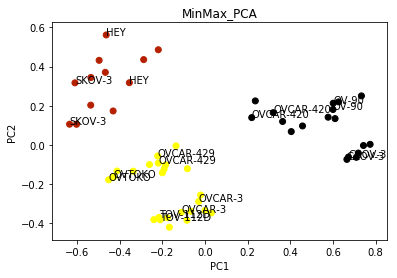

In [41]:
plt.scatter(data_minmax_T[0],data_minmax_T[1],c=clusterer.labels_,cmap="gnuplot")
plt.title("MinMax_PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
for i in range(1,len(cell_types),3):
    plt.annotate(cell_types[i], (data_minmax_T[0][i],data_minmax_T[1][i]))

In [34]:
TSNE?

In [94]:
# random 4, learnig 60, perp 6,early 4
model = TSNE(n_components=2, random_state=10,learning_rate=5,perplexity=15,n_iter=5000,
             early_exaggeration=12,verbose=2,method='exact')
data_tsne = model.fit_transform(DF_minmax)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 54 / 54
[t-SNE] Mean sigma: 0.271604
[t-SNE] Iteration 50: error = 43.1328061, gradient norm = 0.2848959 (50 iterations in 0.065s)
[t-SNE] Iteration 100: error = 40.2411528, gradient norm = 0.0115894 (50 iterations in 0.034s)
[t-SNE] Iteration 150: error = 40.2053462, gradient norm = 0.0000792 (50 iterations in 0.032s)
[t-SNE] Iteration 200: error = 40.2045551, gradient norm = 0.0000124 (50 iterations in 0.030s)
[t-SNE] Iteration 250: error = 40.2045309, gradient norm = 0.0000002 (50 iterations in 0.030s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.204531
[t-SNE] Iteration 300: error = 0.0859701, gradient norm = 0.0027837 (50 iterations in 0.049s)
[t-SNE] Iteration 350: error = 0.0582288, gradient norm = 0.0010466 (50 iterations in 0.039s)
[t-SNE] Iteration 400: error = 0.0566280, gradient norm = 0.0001976 (50 iterations in 0.037s)
[t-SNE] Iteration 450: error = 0.05

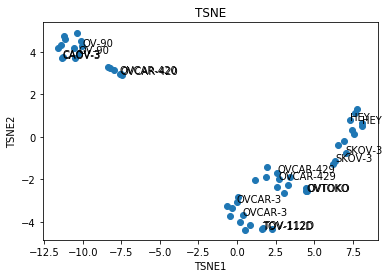

In [95]:
plt.scatter(data_tsne.T[0],data_tsne.T[1],cmap="gnuplot")
plt.title("TSNE")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
for i in range(1,len(cell_types),3):
    plt.annotate(cell_types[i], (data_tsne.T[0][i], data_tsne.T[1][i]))

In [96]:
clusterer_tsne = hdbscan.HDBSCAN(min_cluster_size=5)
clusterer_tsne.fit(data_tsne)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

In [97]:
clusterer_tsne.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

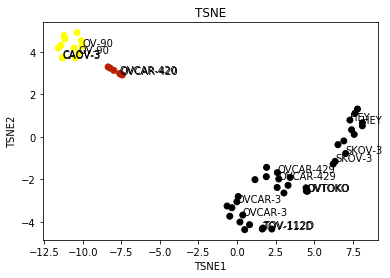

In [98]:
plt.scatter(data_tsne.T[0],data_tsne.T[1],cmap="gnuplot",c=clusterer_tsne.labels_)
plt.title("TSNE")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
for i in range(1,len(cell_types),3):
    plt.annotate(cell_types[i], (data_tsne.T[0][i], data_tsne.T[1][i]))

<IPython.core.display.Javascript object>


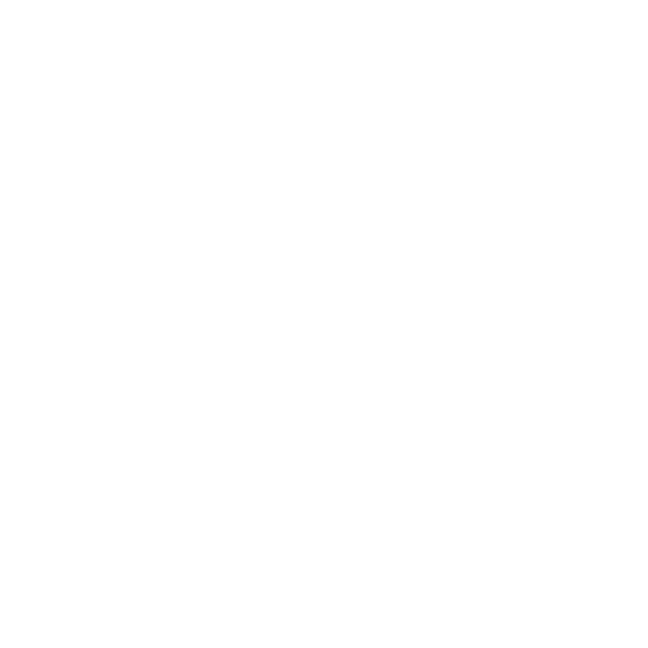

In [44]:
%matplotlib notebook

#plt.rcParams["figure.dpi"] = 300
#Estandarizando
#pca3_minmax = PCA(n_components=3).fit(DF_minmax)
#pca3_data = pca3_minmax.transform(DF_minmax)

pca3_data = DF_minmax

# Plot initialisation
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1,projection='3d')

# Unique category labels: 'D', 'F', 'G', ...
color_labels = DF['cell_type'].unique()
# List of RGB triplets
rgb_values = sns.color_palette("hls", 9)
#rgb_values =  sns.palplot(sns.hls_palette(9, l=.3, s=.8))
# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

ax.scatter(pca3_data.T[0], pca3_data.T[1], pca3_data.T[2], cmap="Set2_r", s=70,c=DF['cell_type'].map(color_map))

custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in rgb_values]
plt.legend(custom_lines,color_labels.tolist(),loc=6)


# make simple, bare axis lines through space:
xAxisLine = ((min(pca3_data.T[0]), max(pca3_data.T[0])), (0.5, 0.5), (0.5,0.5))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r',linestyle='--')
yAxisLine = ((0.5, 0.5), (min(pca3_data.T[1]), max(pca3_data.T[1])), (0.5,0.5))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r',linestyle='--')
zAxisLine = ((0.5, 0.5), (0.5,0.5), (min(pca3_data.T[2]), max(pca3_data.T[2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r',linestyle='--')

ax.set_xlabel("Apoptosis")
ax.set_ylabel("Migration")
ax.set_zlabel("Proliferation")
#plt.legend(color_labels)

for i in range(4,len(cell_types),6):
    ax.text(pca3_data.T[0][i], pca3_data.T[1][i],pca3_data.T[2][i],cell_types[i])

In [14]:
clusterer_minmax = hdbscan.HDBSCAN(min_cluster_size=4,prediction_data=True)
clusterer_minmax.fit(DF_std)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=4, min_samples=None, p=None,
    prediction_data=True)

<IPython.core.display.Javascript object>


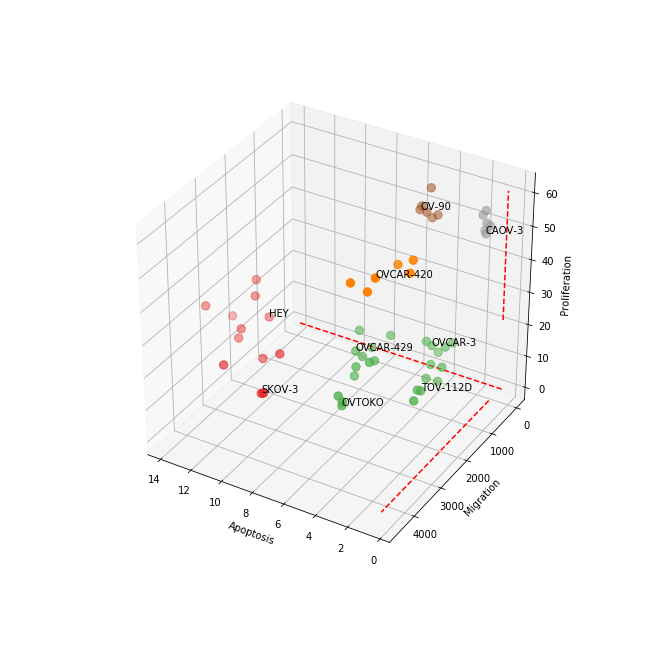

In [17]:
%matplotlib notebook

pca3_data = DF.drop("cell_type",axis=1).values

# Plot initialisation
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1,projection='3d')

ax.scatter(pca3_data.T[0], pca3_data.T[1], pca3_data.T[2], cmap="Set1", s=70,c=clusterer_minmax.labels_)


# make simple, bare axis lines through space:
xAxisLine = ((min(pca3_data.T[0]), max(pca3_data.T[0])), (0.5, 0.5), (0.5,0.5))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r',linestyle='--')
yAxisLine = ((0.5, 0.5), (min(pca3_data.T[1]), max(pca3_data.T[1])), (0.5,0.5))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r',linestyle='--')
zAxisLine = ((0.5, 0.5), (0.5,0.5), (min(pca3_data.T[2]), max(pca3_data.T[2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r',linestyle='--')

ax.set_xlabel("Apoptosis")
ax.set_ylabel("Migration")
ax.set_zlabel("Proliferation")
#plt.legend(color_labels)

for i in range(4,len(cell_types),6):
    ax.text(pca3_data.T[0][i], pca3_data.T[1][i],pca3_data.T[2][i],cell_types[i])

In [102]:
import numpy as np
DF_minmax_labeled = pd.DataFrame(np.c_[DF_minmax,clusterer_minmax.labels_],columns=["Apoptosis","Migration","Proliferation","group"],index=DF.cell_type)
DF_minmax_labeled.to_csv("DF_minmax_clustered.csv")

In [103]:
grouping = DF_minmax_labeled.groupby("group")
grupo0 = grouping.get_group(0)
grupo1 = grouping.get_group(1)
grupo2 = grouping.get_group(2)


In [108]:
grupo0.describe?

In [104]:
print("Grupo 0:",grupo0.index.unique().values)
grupo0.drop("group",axis=1).describe()

Grupo 0: ['SKOV-3' 'OVCAR-429' 'TOV-112D' 'OVTOKO' 'HEY' 'OVCAR-3']


,Apoptosis,Migration,Proliferation
count,36.000000,36.000000,36.000000
mean,0.369463,0.620367,0.121857
std,0.316746,0.186693,0.080885
min,0.000000,0.302876,0.000000
25%,0.090572,0.485271,0.057143
50%,0.273942,0.630479,0.128286
75%,0.621938,0.720555,0.171429
max,1.000000,1.000000,0.342857


In [105]:
print("Grupo 1:",grupo1.index.unique().values)
grupo1.drop("group",axis=1).describe()

Grupo 1: ['OVCAR-420']


,Apoptosis,Migration,Proliferation
count,6.000000,6.000000,6.000000
mean,0.177431,0.650556,0.866667
std,0.061374,0.129394,0.053197
min,0.094284,0.485002,0.800000
25%,0.132517,0.548353,0.821429
50%,0.193022,0.670811,0.885714
75%,0.209540,0.743818,0.907143
max,0.256867,0.801024,0.914286


In [106]:
print("Grupo 2:",grupo2.index.unique().values)
grupo2.drop("group",axis=1).describe()

Grupo 2: ['OV-90' 'CAOV-3']


,Apoptosis,Migration,Proliferation
count,12.000000,12.000000,12.000000
mean,0.156273,0.053816,0.864286
std,0.126390,0.037114,0.059839
min,0.020787,0.000000,0.800000
25%,0.034521,0.033038,0.821429
50%,0.151076,0.047954,0.857143
75%,0.279324,0.068903,0.892857
max,0.296956,0.114909,1.000000


In [18]:
DF

,Apoptosis,Migration,Proliferation,cell_type
sample,,,,
1,8.45,3644.00,27.886500,SKOV-3
2,10.67,4372.80,26.771040,SKOV-3
3,11.78,3279.60,24.540120,SKOV-3
4,9.76,3526.00,23.424660,SKOV-3
5,8.25,4400.00,22.309200,SKOV-3
6,7.79,4568.00,24.540120,SKOV-3
7,1.67,2936.00,56.888460,OVCAR-420
8,3.23,3523.20,53.542080,OVCAR-420
9,1.98,2642.40,58.003920,OVCAR-420
